In [1]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
from sisään_uloskäynnit import *
from reittien_erottelu import *
from isolation_forest import *
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [2]:
df = pd.read_csv('/home/jovyan/work/projekti-2-team-fox/laurijutut/projekti2.csv')

df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 10532
uniques in y 7899
uniques in z 3
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100 400   0]
uniques in q [0]
------------------------------
Number of nodes: 32
------------------------------
Outliers

Data with outliers:  13890906
Ouliers removed:     376791
Data after:  13514115
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


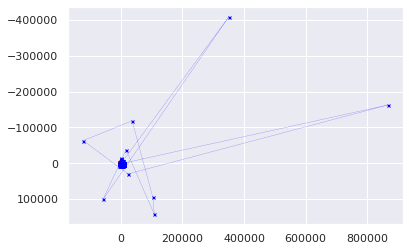

In [3]:

df = find_outliers(df)
%time

In [4]:
%time
df = clean_dataframe(df)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 14.5 µs


In [5]:
df.node_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [7]:
df1= df[df.node_id == 1]
df2= df[df.node_id == 2]
df3= df[df.node_id == 3]
df4= df[df.node_id == 4]
df5= df[df.node_id == 5]
df6= df[df.node_id == 6]
df7= df[df.node_id == 7]
df8= df[df.node_id == 8]
df9= df[df.node_id == 9]
df10= df[df.node_id == 10]
df11= df[df.node_id == 11]
df12= df[df.node_id == 12]
df13= df[df.node_id == 13]
df14= df[df.node_id == 14]
df15= df[df.node_id == 15]
df16= df[df.node_id == 16]
df17= df[df.node_id == 17]
df18= df[df.node_id == 18]
df19= df[df.node_id == 19]
df20= df[df.node_id == 20]
df21= df[df.node_id == 21]
df22= df[df.node_id == 22]
df23= df[df.node_id == 23]
df24= df[df.node_id == 24]
df25= df[df.node_id == 25]
df26= df[df.node_id == 26]
df27= df[df.node_id == 27]
df28= df[df.node_id == 28]
df29= df[df.node_id == 29]
df30= df[df.node_id == 30]
df31= df[df.node_id == 31]
df32= df[df.node_id == 32]

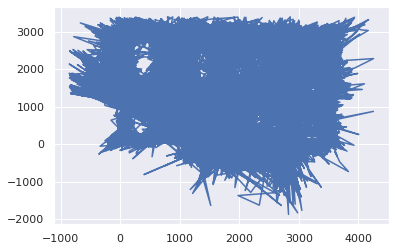

In [28]:
plt.plot(df1.x, df1.y)


In [37]:
for i in range(1,33):
    print('plt.plot(df'+str(i)+'.x, df'+str(i)+'.y)')


plt.plot(df1.x, df1.y)
plt.plot(df2.x, df2.y)
plt.plot(df3.x, df3.y)
plt.plot(df4.x, df4.y)
plt.plot(df5.x, df5.y)
plt.plot(df6.x, df6.y)
plt.plot(df7.x, df7.y)
plt.plot(df8.x, df8.y)
plt.plot(df9.x, df9.y)
plt.plot(df10.x, df10.y)
plt.plot(df11.x, df11.y)
plt.plot(df12.x, df12.y)
plt.plot(df13.x, df13.y)
plt.plot(df14.x, df14.y)
plt.plot(df15.x, df15.y)
plt.plot(df16.x, df16.y)
plt.plot(df17.x, df17.y)
plt.plot(df18.x, df18.y)
plt.plot(df19.x, df19.y)
plt.plot(df20.x, df20.y)
plt.plot(df21.x, df21.y)
plt.plot(df22.x, df22.y)
plt.plot(df23.x, df23.y)
plt.plot(df24.x, df24.y)
plt.plot(df25.x, df25.y)
plt.plot(df26.x, df26.y)
plt.plot(df27.x, df27.y)
plt.plot(df28.x, df28.y)
plt.plot(df29.x, df29.y)
plt.plot(df30.x, df30.y)
plt.plot(df31.x, df31.y)
plt.plot(df32.x, df32.y)


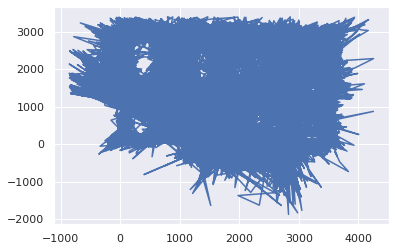

In [38]:
plt.plot(df1.x, df1.y)

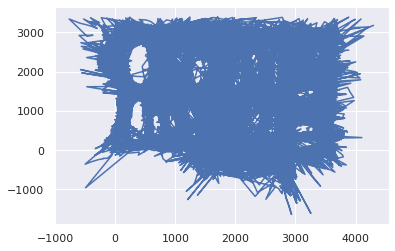

In [39]:
plt.plot(df2.x, df2.y)

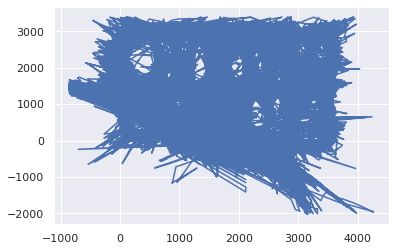

In [40]:
plt.plot(df3.x, df3.y)

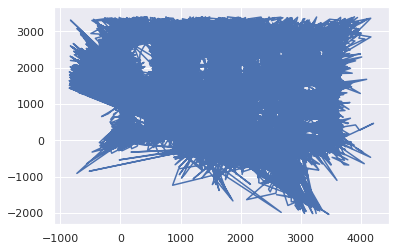

In [41]:
plt.plot(df4.x, df4.y)

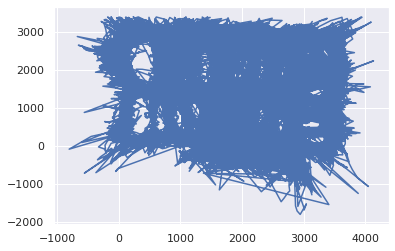

In [42]:
plt.plot(df5.x, df5.y)

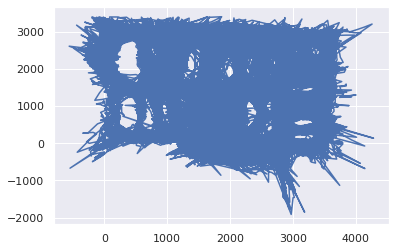

In [43]:
plt.plot(df6.x, df6.y)


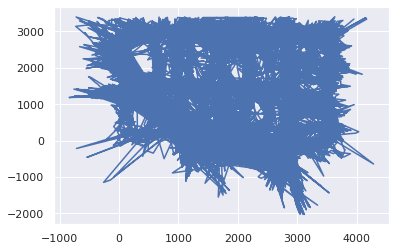

In [44]:
plt.plot(df7.x, df7.y)

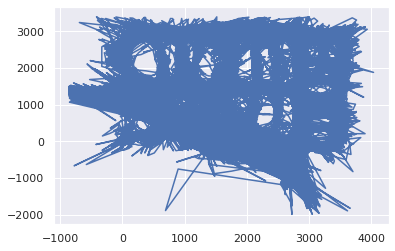

In [45]:
plt.plot(df8.x, df8.y)

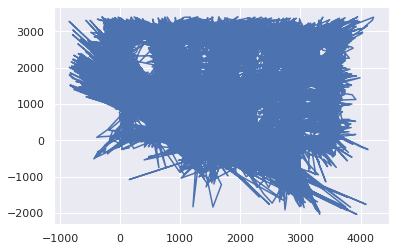

In [46]:
plt.plot(df9.x, df9.y)

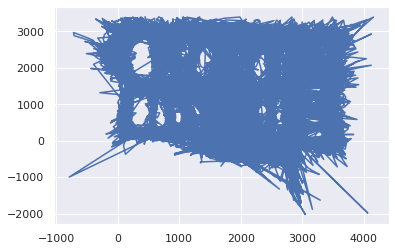

In [47]:
plt.plot(df10.x, df10.y)

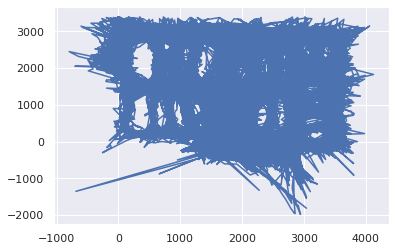

In [54]:
plt.plot(df11.x, df11.y)

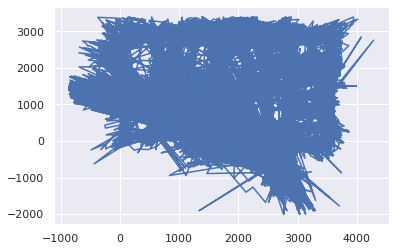

In [55]:
plt.plot(df12.x, df12.y)

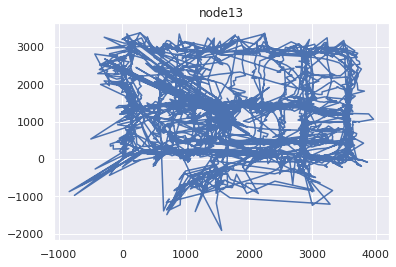

In [78]:

plt.plot(df13.x, df13.y)
plt.title('node13')
plt.show()

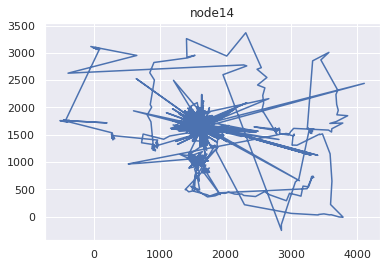

In [79]:
plt.plot(df14.x, df14.y)
plt.title('node14')
plt.show()

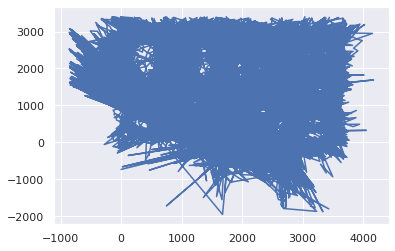

In [58]:
plt.plot(df15.x, df15.y)

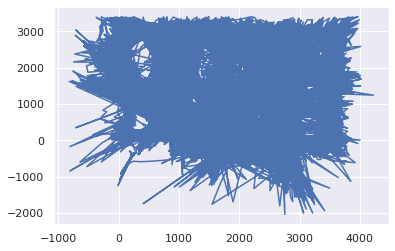

In [59]:
plt.plot(df16.x, df16.y)

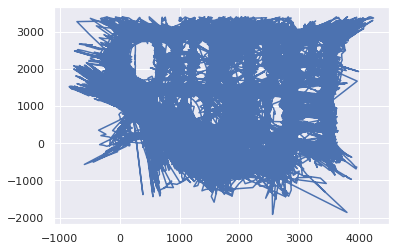

In [60]:
plt.plot(df17.x, df17.y)

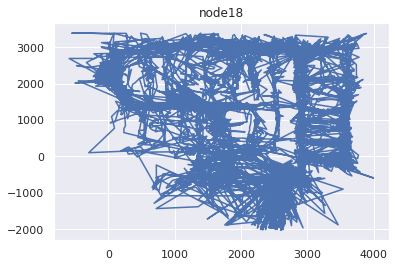

In [77]:
plt.plot(df18.x, df18.y)
plt.title('node18')
plt.show()

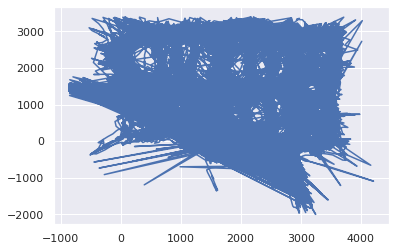

In [62]:
plt.plot(df19.x, df19.y)

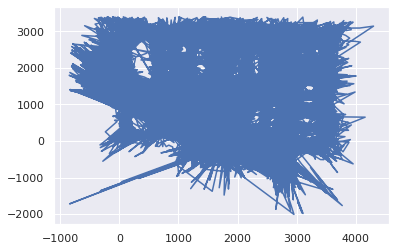

In [63]:
plt.plot(df20.x, df20.y)

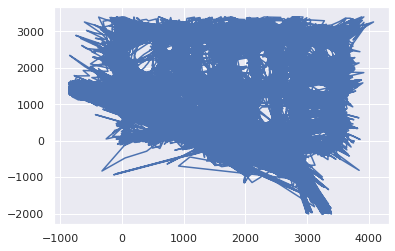

In [64]:
plt.plot(df21.x, df21.y)

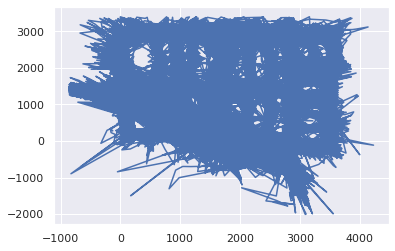

In [65]:
plt.plot(df22.x, df22.y)

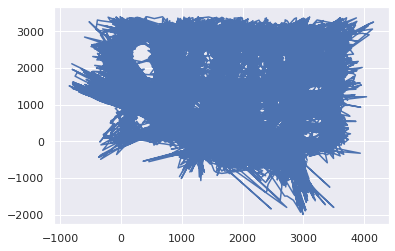

In [66]:
plt.plot(df23.x, df23.y)

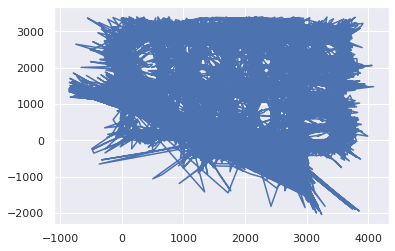

In [67]:
plt.plot(df24.x, df24.y)

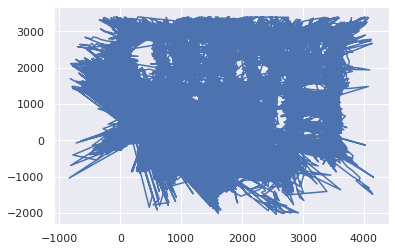

In [68]:
plt.plot(df25.x, df25.y)

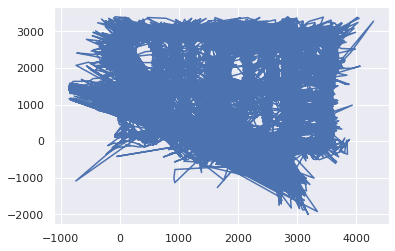

In [69]:
plt.plot(df26.x, df26.y)

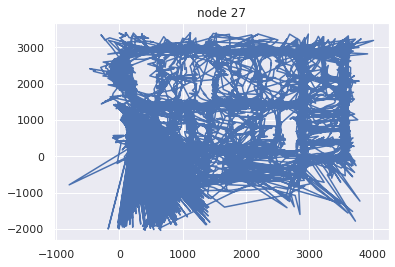

In [80]:
plt.plot(df27.x, df27.y)
plt.title('node 27')
plt.show()

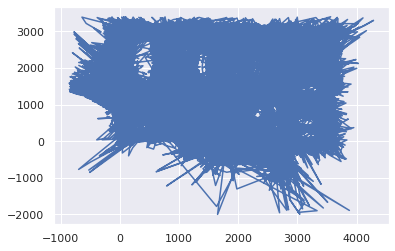

In [71]:
plt.plot(df28.x, df28.y)

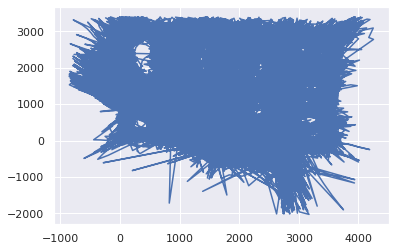

In [72]:
plt.plot(df29.x, df29.y)

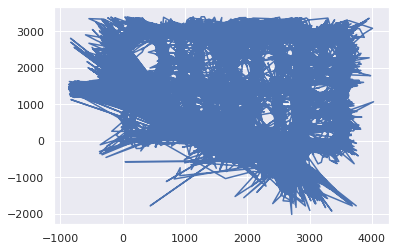

In [73]:
plt.plot(df30.x, df30.y)

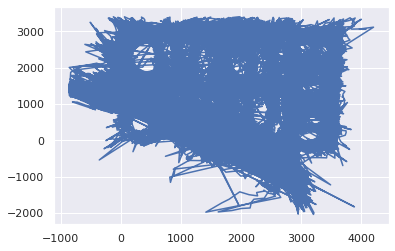

In [74]:
plt.plot(df31.x, df31.y)

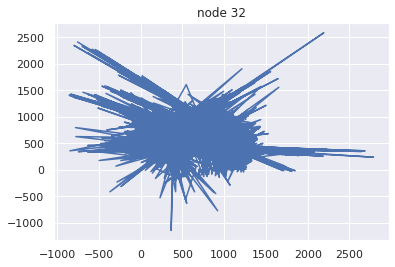

In [81]:
plt.plot(df32.x, df32.y)
plt.title('node 32')
plt.show()

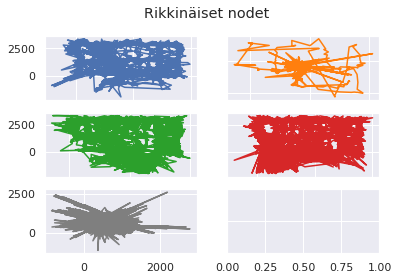

In [97]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6 )) = plt.subplots(3, 2)
fig.suptitle('Rikkinäiset nodet')
ax1.plot(df13.x, df13.y)
ax2.plot(df14.x, df14.y, 'tab:orange')
ax3.plot(df18.x, df18.y, 'tab:green')
ax4.plot(df27.x, df27.y, 'tab:red')
ax5.plot(df32.x, df32.y, 'tab:grey')
    

for ax in fig.get_axes():
    ax.label_outer()

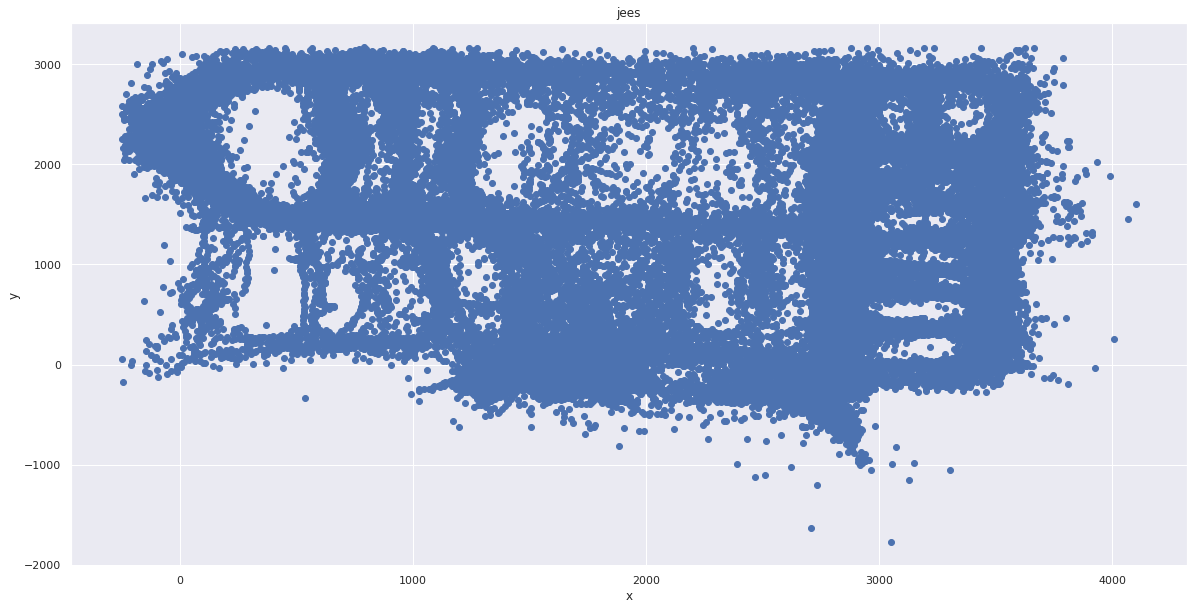

In [6]:

plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö

plt.title('jees')
plt.xlabel('x')
plt.ylabel('y')


plt.scatter(df['x'], df['y'])

plt.show()

In [9]:
df = df.drop(df[(df.x < 1000) & (df.x > 2200)].index)
df = df.drop(df[(df.y < -1000) & (df.y > 800)].index)



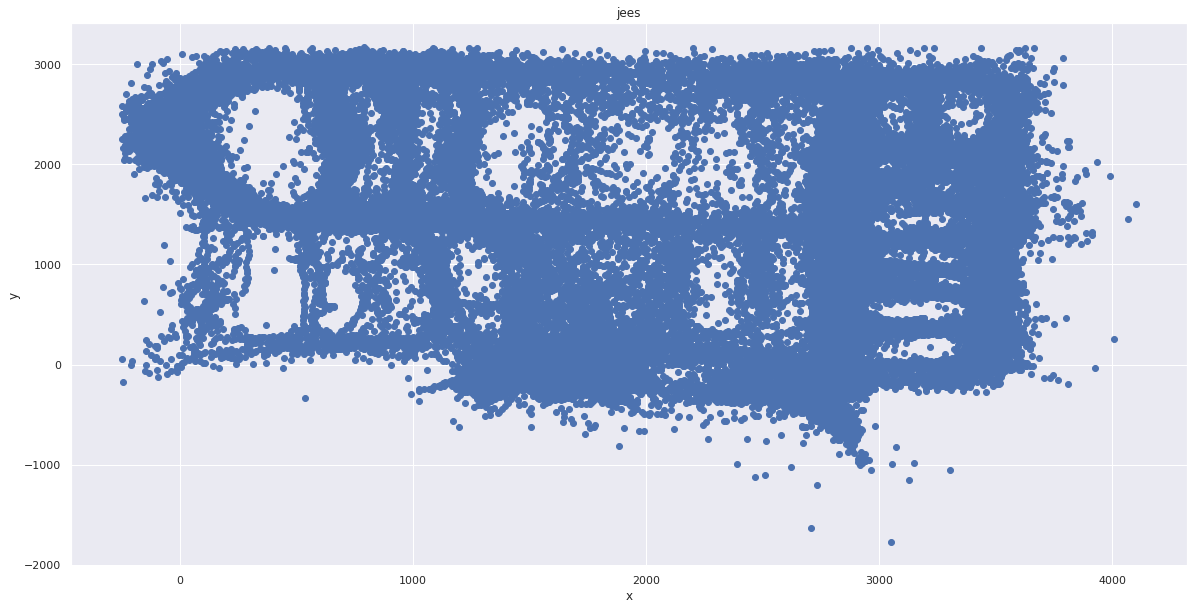

In [10]:
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö

plt.title('jees')
plt.xlabel('x')
plt.ylabel('y')


plt.scatter(df['x'], df['y'])

plt.show()